<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Diego Alberto López Lazareno y Alejandra Rico Rosales.

**Fecha:** 12 de octubre del 2021.

**Expediente** : IF722100, IF720838.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/diegolazareno/Tarea5_DALopez_ARico

# Tarea 5: Clase 9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import math
import scipy.special as sps 
from math import factorial as fac
import scipy.stats as st

## Enunciado de tarea

Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

### Ejercicio 1: (enunciado)

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

Código de solución Diego

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución Alejandra

In [ ]:
# Código de solución estudiante 2

<center>    
Transformada inversa

$$u=\frac{2}{\pi} \sin^{-1}{\sqrt{x}}$$

$$x=\sin{\left(\frac{\pi u}{2}\right)^2} \sim f(x)$$

$$f(x)=\frac{d}{dx} F(x)$$

$$\frac{d\sin^{-1}{x}}{dx}=\frac{1}{\sqrt{1-x^2}}$$

$$ f(x)=\frac{d}{dx}\left(\frac{2}{\pi} \sin^{-1}{\left(\sqrt{x}\right)}\right)$$

<center>
Función de densidad de probabilidad
$$f(x)=\frac{1}{\pi\sqrt{x}\sqrt{1-x}}$$ 

<ipython-input-5-a1e0aee5ed78>:9: RuntimeWarning: divide by zero encountered in true_divide
  y2 = 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)


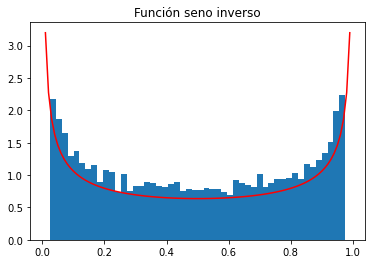

In [5]:
N=10000

def mov(N):
    k = np.random.uniform(.1,.9,N)
    y = (np.sin((np.pi*k)/2))**2
    return y

x = np.arange(0,1,0.01)
y2 = 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)

plt.plot(x,y2,'r-')

r1 = mov(N)
plt.hist(r1,bins=50,density=True)
plt.title('Función seno inverso')
plt.show()

### Ejercicio 2: (enunciado)

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

Código de solución Diego

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución Alejandra

In [6]:
# Código de solución estudiante 2

def binom(n, p):
    P = np.zeros(n)
    for i in range (n):
        P[i] = (np.math.factorial(n)/(np.math.factorial(i+1)*np.math.factorial(n-i-1)))*p**(i+1)*((1-p)**(n-i-1))
    return P,P.cumsum() 

n = 10
p = 0.7
val=np.arange(1,n+1)
df,cf =binom(n,p)

def gendisc(pacum, ind, N):
    
    U =np.random.rand(N)
    dicc = {i: P for i, P in enumerate(ind)}
    y = pd.Series([sum([1 for p in pacum if p < ui]) for ui in U]).map(dicc)
    return y

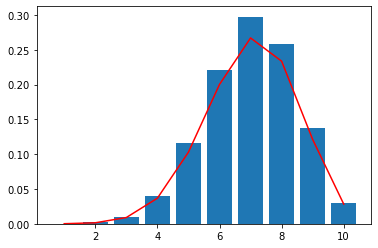

In [7]:
N = 10000
dbin = gendisc(cf, val, N)
y, x= np.histogram(dbin,bins=len(set(val)),density=True)
plt.bar(val,y)
plt.plot(val,df,c='r')
plt.show()